# Random Forest Regression - Holiday Spend Project

Overview:
- In this project, **2022/W52: Average holiday Spending by Americans.xlsx ([https://data.world/vizwiz](https://data.world/vizwiz))** will be loaded into a machine learning pipeline in order to analyse customer spending behavor when on vacation. 

Goal:
- Analyse the accuracy of the `RandomForestRegressor` by comparing real and predicted sales data.
- Predict on new data to forecast future spend.

Steps:
1.  Import machine learning packages and source data [here.](https://data.world/makeovermonday/2022w52)
2.  Explore the data set.
3.  Apply pre-processing.
4.  Create regression model.
5.  Evaluate best model.
6.  Fit data to best model
7.  Predict on best model.
8.  Measure key metrics.
9.  Predict new data.
10. Visualise 2D repesentation of model.

## 1. Importing the Dataset

In [184]:
# Remove SSL verification requirement.
import ssl 
ssl._create_default_https_context = ssl._create_unverified_context

# Import data science packages.
import pandas as pd
import numpy as np

# Download and display dataset.
df = pd.read_excel('https://query.data.world/s/dleaebmqje3gaylsu33w6bgq36sbxr?dws=00000')
df.head()

,Year,Gifts for Family,Gifts for Friends,Gifts for Coworkers,Other Gifts
0,2004,405,71,22,41
1,2005,419,79,21,44
2,2006,428,81,21,42
3,2007,434,83,21,35
4,2008,389,79,22,36


## 2. Explore the Dataset

In [185]:
# Check for non-nulls.
print(df.info())

# Check statistics.
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Year                 18 non-null     int64
 1   Gifts for Family     18 non-null     int64
 2   Gifts for Friends    18 non-null     int64
 3   Gifts for Coworkers  18 non-null     int64
 4   Other Gifts          18 non-null     int64
dtypes: int64(5)
memory usage: 848.0 bytes
None


,Year,Gifts for Family,Gifts for Friends,Gifts for Coworkers,Other Gifts
count,18.000000,18.000000,18.000000,18.000000,18.000000
mean,2012.500000,448.277778,77.222222,24.277778,33.333333
std,5.338539,41.834134,4.413289,4.141690,5.573044
min,2004.000000,387.000000,67.000000,19.000000,25.000000
25%,2008.250000,420.000000,75.000000,21.250000,29.000000
50%,2012.500000,433.000000,79.000000,24.500000,33.000000
75%,2016.750000,484.000000,80.000000,26.000000,36.000000
max,2021.000000,514.000000,84.000000,35.000000,44.000000


## 3. Apply Preprocessing

In [186]:
# Sum total gift amount for each year.
df["Total"] = df.sum(axis=1)

# Reduce dimensions.
df = df[["Year", "Total"]]
df.head()

,Year,Total
0,2004,2543
1,2005,2568
2,2006,2578
3,2007,2580
4,2008,2534


## 4. Create Regression Model

In [187]:
# Import machine learning packages
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

# Extract feature and target variables from data
X = df.drop(["Total"], axis=1)
y = df["Total"]

# Split train and test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Create forest estimator.
forest_estimator = RandomForestRegressor()

# Create and configure forest cross validation model.
forest_grid_param = {"n_estimators" : [1, 5, 10, 25, 50, 75, 100]}
forest_grid_CV = GridSearchCV(estimator=forest_estimator, 
                              param_grid=forest_grid_param, verbose=2)

# Fit the cross_validator model.
forest_grid_CV.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] END .....................................n_estimators=1; total time=   0.0s
[CV] END .....................................n_estimators=1; total time=   0.0s
[CV] END .....................................n_estimators=1; total time=   0.0s
[CV] END .....................................n_estimators=1; total time=   0.0s
[CV] END .....................................n_estimators=1; total time=   0.0s
[CV] END .....................................n_estimators=5; total time=   0.0s
[CV] END .....................................n_estimators=5; total time=   0.0s
[CV] END .....................................n_estimators=5; total time=   0.0s
[CV] END .....................................n_estimators=5; total time=   0.0s
[CV] END .....................................n_estimators=5; total time=   0.0s
[CV] END ....................................n_estimators=10; total time=   0.0s
[CV] END ....................................n_es

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [1, 5, 10, 25, 50, 75, 100]},
             verbose=2)

## 5. Evaluate best model

In [188]:
# Sort results by rank ascending.
forest_cv_results = pd.DataFrame(forest_grid_CV.cv_results_).sort_values(by="rank_test_score")
forest_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.027916,0.001854,0.002703,0.000347,25,{'n_estimators': 25},0.749869,0.733530,0.745737,0.793028,0.987395,0.801912,0.094892,1
4,0.051006,0.000705,0.003403,0.000181,50,{'n_estimators': 50},0.667314,0.707065,0.727077,0.848653,0.972700,0.784562,0.111858,2
2,0.011283,0.000212,0.001773,0.000022,10,{'n_estimators': 10},0.530830,0.632369,0.696631,0.995531,0.986277,0.768327,0.189290,3
5,0.075824,0.001518,0.004856,0.000298,75,{'n_estimators': 75},0.739649,0.698195,0.694234,0.709080,0.994952,0.767222,0.114973,4
6,0.099724,0.001524,0.005450,0.000415,100,{'n_estimators': 100},0.708959,0.659175,0.702226,0.724067,0.992175,0.757320,0.119390,5
1,0.007526,0.001338,0.001962,0.000468,5,{'n_estimators': 5},0.582215,0.609218,0.779810,0.787874,0.985183,0.748860,0.145327,6
0,0.004230,0.000510,0.002560,0.000515,1,{'n_estimators': 1},0.903760,0.644759,0.580545,-0.119339,0.918367,0.585618,0.377472,7


## 6. Fit data to best model

In [189]:
# Select best estimator.
best_forest_estimator = forest_grid_CV.best_estimator_
best_forest_estimator.fit(X_train, y_train)

RandomForestRegressor(n_estimators=25)

## 7. Predict on best model

In [190]:
# Predict target values.
y_pred = best_forest_estimator.predict(X_test)
y_pred 

array([2562.96, 2562.96, 2558.84, 2542.76, 2562.96, 2641.64])

## 8. Display key metrics

In [191]:
# Import key metrics.
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Print key metrics.
print("Mean squared error: ", round(mean_squared_error(y_test, y_pred),2))
print("Mean absolute error: ", round(mean_absolute_error(y_test, y_pred),2))

# Create table comparison of real and predicted targets.
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame({"Total (Predicted)" : y_pred}).set_index(y_test.index)
df_forest = pd.concat([X_test, y_test, y_pred], axis=1).sort_values(by="Year")
df_forest

Mean squared error:  283.15
Mean absolute error:  14.77


,Year,Total,Total (Predicted)
0,2004,2543,2562.96
1,2005,2568,2562.96
3,2007,2580,2562.96
5,2009,2517,2542.76
8,2012,2562,2558.84
13,2017,2624,2641.64


## 9. Predict on new data

In [192]:
# Predict holiday spend for current year and next.
X_test_new = pd.DataFrame({"Year" : [2024, 2025]})
y_pred_new = best_forest_estimator.predict(X_test_new)

# Store new result in dataframe and append to previous result.
y_pred_new = pd.DataFrame({"Total (Predicted)" : y_pred_new})
df_forest_new = pd.concat([X_test_new, y_pred_new], axis=1)
df_forest_result = pd.concat([df_forest, df_forest_new], axis=0 )
df_forest_result

,Year,Total,Total (Predicted)
0,2004,2543.0,2562.96
1,2005,2568.0,2562.96
3,2007,2580.0,2562.96
5,2009,2517.0,2542.76
8,2012,2562.0,2558.84
13,2017,2624.0,2641.64
0,2024,NaN,2670.44
1,2025,NaN,2670.44


## 10. Visualise data model

<Axes: title={'center': 'Vacation Spend: Real Total vs Predicted Total'}, xlabel='Year'>

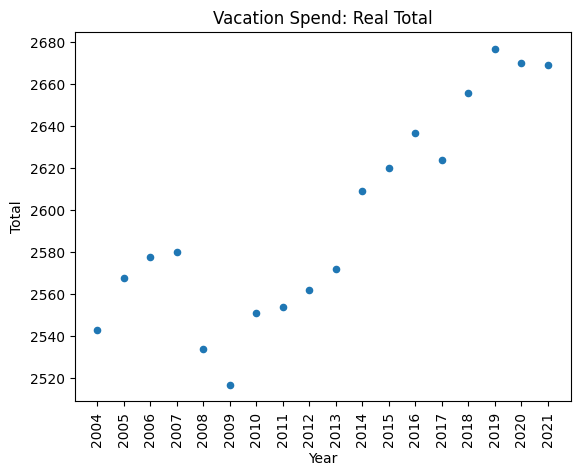

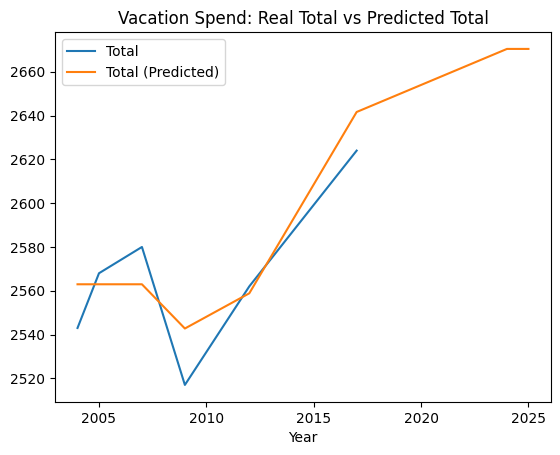

In [193]:
# Visualise source data as scatter plot.
df.plot(kind='scatter', x="Year", y='Total', xticks = df["Year"], rot=90, 
        title="Vacation Spend: Real Total")

# Visualise machine learning model as line plot.
df_forest_result.plot(kind="line", x="Year", y=["Total", "Total (Predicted)"], 
               title="Vacation Spend: Real Total vs Predicted Total")